In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1)Загрузка и анализ данных

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(4, 'target', iris.target) #Добавляем столбец со значениями классов
df = df.loc[df['target'] != 0] #Удаление обьектов с классом 0
df['target'] = df['target'].replace({1: 0, 2: 1}) #Меняем классы на 0 и 1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [5]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
y = df[['target']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36) #Делим на тестовую и проверочную выборку

## 2)Реализуйте логистическую регрессию в классе. Градиентный спуск

In [48]:
class LogRes:

    costs = [] #Список оценок
    thetas = [] #Веса
    preds = [] #Список предсказаний
    list_params_gd = [] #Список изменений весов

    #логистическая регрессия
    def calc(self, x, thetas):
        z = np.dot(x, thetas)
        return 1.0 / (1 + np.exp(-z))

    #Функция LogLoss
    def LogLoss(self, y, y_pred):
        total = []
        for i in range(len(y)): 
            # рассчитаем функцию потерь для y = 1
            y_one_loss = y[i] * np.log(y_pred[i] + 1e-9)
            # также рассчитаем функцию потерь для y = 0
            y_zero_loss = (1 - y[i]) * np.log(1 - y_pred[i] + 1e-9)
            total.append(y_zero_loss + y_one_loss)
        # сложим и разделим на количество наблюдений
        return -np.mean(total)
    
    #Производная
    def gradient(self, x, y, y_pred):
        grad = [0] * len(x[0])
        for i in range(len(x[0])):
            for n in range(len(x)):
                grad[i] += (y_pred[n] - y[n]) * x[n][i]
        return grad
    
    def fit(self, x, y, epochs = 600, learn_rate = 0.001):
        np.random.seed(42)
        x = np.hstack((x, np.full((x.shape[0], 1), fill_value=1))) #Добавляем колонку с 1 для x0

        #Обновляем массивы
        self.costs = []
        self.preds = []
        self.thetas = np.random.normal(size=(5,))
        self.list_params_gd = [self.thetas.copy()]

        for _ in range(epochs):
            y_pred = []
            for i in range(len(x)):
                #Делаем прогноз по всем x
                y_pred.append(self.calc(x[i], self.thetas))
            self.preds.append(y_pred)

            # Расчитаем ошибку по LogLoss
            self.costs.append(self.LogLoss(y, y_pred))
            # Расчитаем градиент
            self.grad = self.gradient(x, y, y_pred)
            # Обновляем веса
            for i in range(len(self.thetas)):
                self.thetas[i] -= learn_rate * self.grad[i]

            self.list_params_gd.append(self.thetas.copy())
    
    # Делаем прогноз на основе обучения
    def predict(self, x):
        x = np.hstack((x, np.full((x.shape[0], 1), fill_value=1))) #Добавляем колонку с 1 для x0

        y_pred = []
        for i in range(len(x)):
            #Делаем прогноз по всем x
            y_pred.append(self.calc(x[i], self.thetas))
        return y_pred

## 3)Реализуйте логистическую регрессию в классе. RMSProp.

In [49]:
class LogRes_RMS:

    costs = [] #Список оценок
    thetas = [] #Веса
    preds = [] #Список предсказаний
    list_s_gd = []
    list_params_gd = [] #Список изменений весов

    #логистическая регрессия
    def calc(self, x, thetas):
        z = np.dot(x, thetas)
        return 1.0 / (1 + np.exp(-z))

    #Функция LogLoss
    def LogLoss(self, y, y_pred):
        total = []
        for i in range(len(y)): 
            # рассчитаем функцию потерь для y = 1
            y_one_loss = y[i] * np.log(y_pred[i] + 1e-9)
            # также рассчитаем функцию потерь для y = 0
            y_zero_loss = (1 - y[i]) * np.log(1 - y_pred[i] + 1e-9)
            total.append(y_zero_loss + y_one_loss)
        # сложим и разделим на количество наблюдений
        return -np.mean(total)
    
    #Производная
    def gradient(self, x, y, y_pred):
        grad = [0] * len(x[0])
        for i in range(len(x[0])):
            for n in range(len(x)):
                grad[i] += (y_pred[n] - y[n]) * x[n][i]
        return grad
    
    def fit(self, x, y, epochs = 600, learn_rate = 0.001, beta = 0.9):
        np.random.seed(42)
        x = np.hstack((x, np.full((x.shape[0], 1), fill_value=1))) #Добавляем колонку с 1 для x0

        #Обновляем массивы
        self.costs = []
        self.preds = []
        self.thetas = np.random.normal(size=(5,))
        self.list_params_gd = [self.thetas.copy()]
        self.list_s_gd = np.zeros(len(self.thetas))

        for _ in range(epochs):
            y_pred = []
            for i in range(len(x)):
                #Делаем прогноз по всем x
                y_pred.append(self.calc(x[i], self.thetas))
            self.preds.append(y_pred)

            # Расчитаем ошибку по LogLoss
            self.costs.append(self.LogLoss(y, y_pred))
            # Расчитаем градиент
            self.grad = self.gradient(x, y, y_pred)
            # Обновляем веса
            for i in range(len(self.thetas)):
                self.list_s_gd[i] = beta * self.list_s_gd[i] + (1 - beta) * np.square(self.grad[i])
                self.thetas[i] -= learn_rate * self.grad[i] / (np.sqrt( self.list_s_gd[i] )+ pow(10,-4))

            self.list_params_gd.append(self.thetas.copy())
    
    # Делаем прогноз на основе обучения
    def predict(self, x):
        x = np.hstack((x, np.full((x.shape[0], 1), fill_value=1))) #Добавляем колонку с 1 для x0

        y_pred = []
        for i in range(len(x)):
            #Делаем прогноз по всем x
            y_pred.append(self.calc(x[i], self.thetas))
        return y_pred

## 3)Обучение и тест

In [ ]:
model = LogRes()
model.fit(X_train, y_train)

model_rms = LogRes_RMS()
model_rms.fit(X_train, y_train)

### Смотрим как менялась ошибка

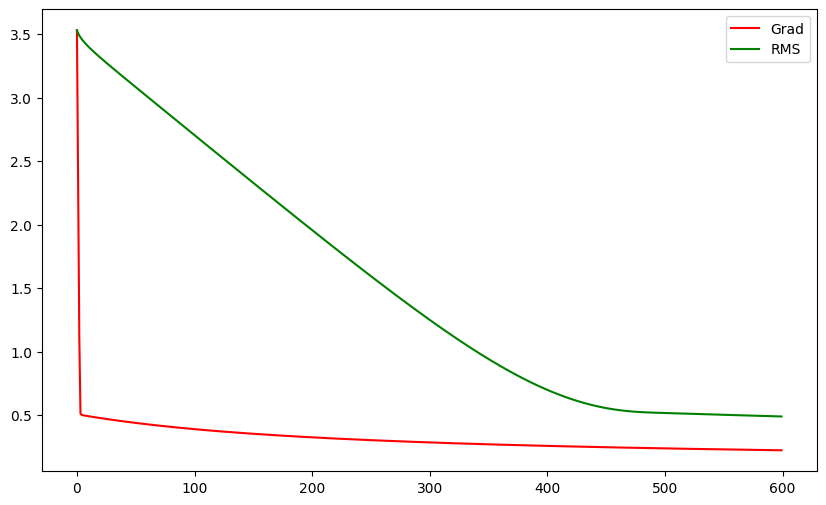

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(model.costs, color = 'red', label = 'Grad')
plt.plot(model_rms.costs, color = 'green', label = 'RMS')
plt.legend()
plt.show()

### Прогоняем через тестовые модели

In [59]:
y_pred = model.predict(X_test)

x_test_out = []
for x in X_test:
    x_test_out.append(x[0])

for i in range(len(y_pred)):
    if(y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0


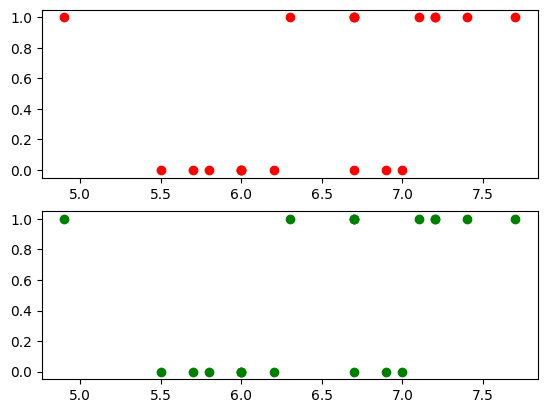

In [60]:
figure, axis = plt.subplots(2)
axis[0].scatter(x_test_out, y_pred, color='red')
axis[1].scatter(x_test_out, y_test, color='green')
plt.show()

In [61]:
y_pred = model_rms.predict(X_test)

x_test_out = []
for x in X_test:
    x_test_out.append(x[0])

for i in range(len(y_pred)):
    if(y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0


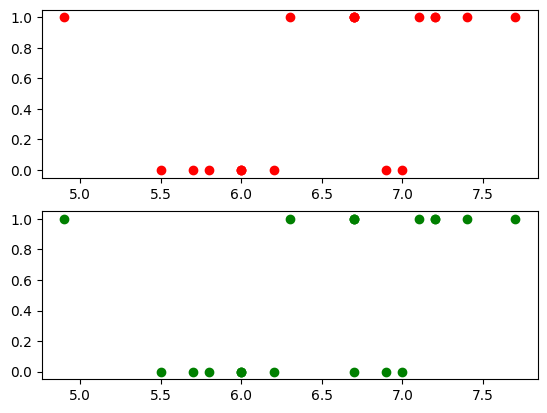

In [62]:
figure, axis = plt.subplots(2)
axis[0].scatter(x_test_out, y_pred, color='red')
axis[1].scatter(x_test_out, y_test, color='green')
plt.show()

## 6)Сравните значение метрик для реализованных методов оптимизации

Как мы видим, Градиентный спуск обучвется намного быстрее. Это значит, что в данной задаче его использовать приоритетнее